<a href="https://colab.research.google.com/github/Cybertron1759/CODSOFT/blob/main/Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#IMPORT DATASET
df=pd.read_csv(r'https://github.com/Cybertron1759/CODSOFT/raw/main/tested.csv')

In [ ]:
#DESCRIBING DATASET
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
#CHECKING FOR NULL VALUES
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

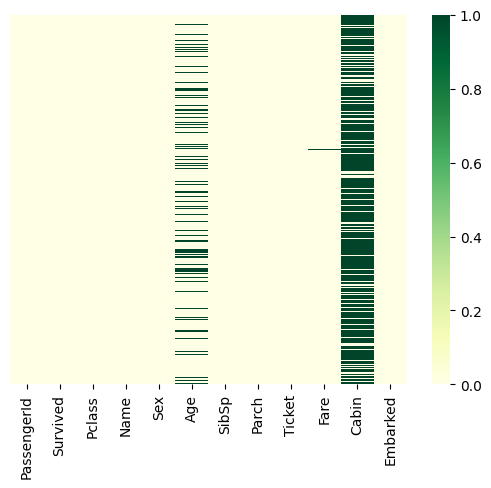

In [ ]:
#REPRESENTATION OF NULL VALUES
sns.heatmap(df.isnull(),yticklabels=False,cmap='YlGn')

In [ ]:
#REMOVING THE NULL VALUES
df['age']=df['age'].fillna(df['age'].mean())
df['fare']=df['fare'].fillna(df['fare'].mean())
df.drop(['cabin','boat','body'],axis=1,inplace=True)
df.dropna(inplace=True)
df.isnull().sum()

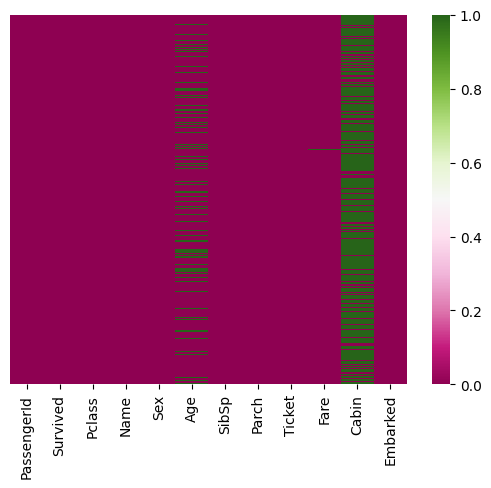

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='PiYG')
plt.show()

<ipython-input-15-b21169accbe7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


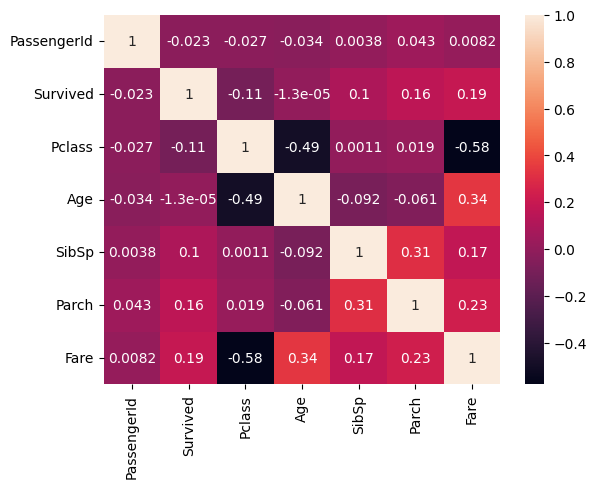

In [ ]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
#DATA VISUALIZATION
sns.countplot(x='survived',data=df)

<Axes: xlabel='survived', ylabel='count'>

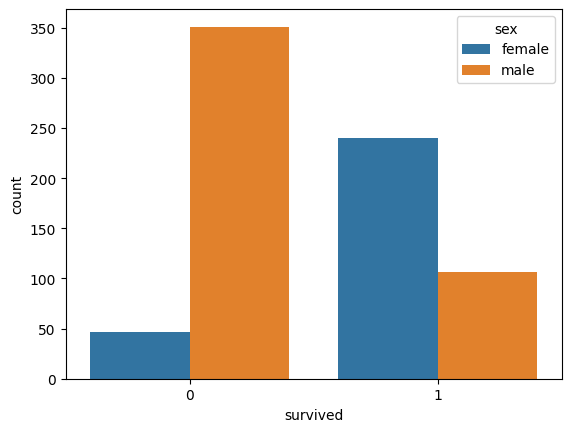

In [ ]:
sns.countplot(x='survived',hue='sex',data=df)

<Axes: xlabel='survived', ylabel='count'>

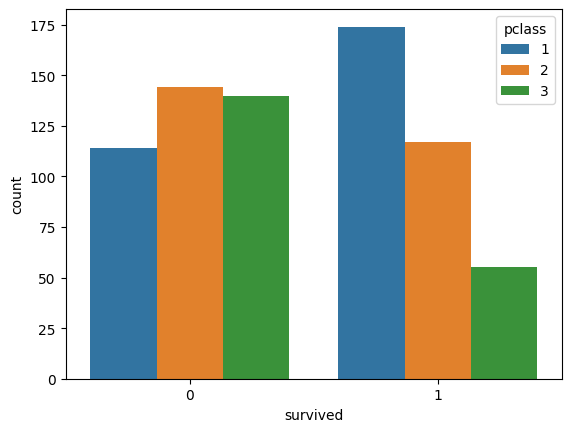

In [ ]:
sns.countplot(x='survived',hue='pclass',data=df)

<Axes: xlabel='survived', ylabel='count'>

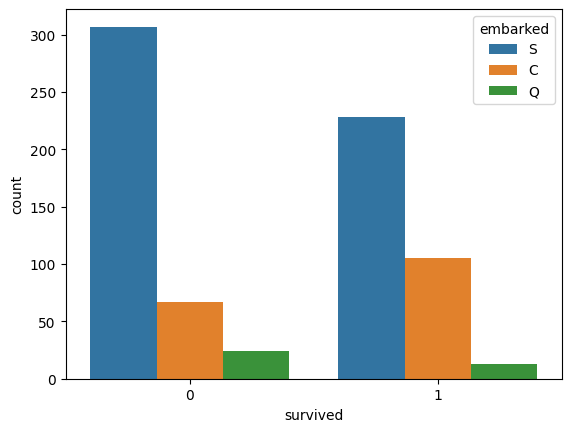

In [ ]:
sns.countplot(x='survived',hue='embarked',data=df)

<Axes: ylabel='Frequency'>

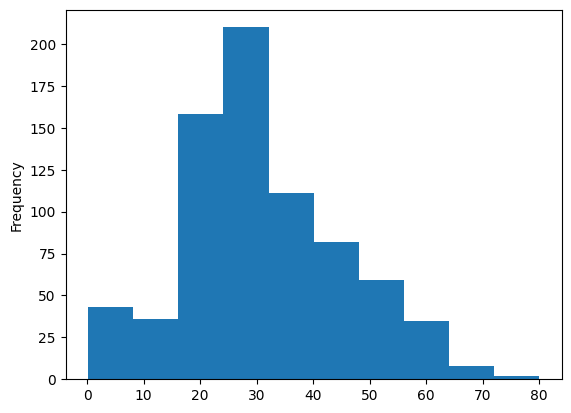

In [ ]:
df['age'].plot.hist()

<Axes: xlabel='pclass', ylabel='age'>

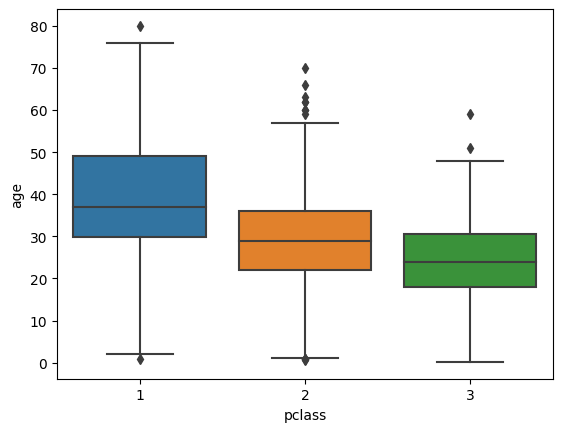

In [ ]:
sns.boxplot(x='pclass',y='age',data=df)

In [ ]:
# CONVERTING NUMERICAL VALUES TO CATEGORICAL VALUES
Sex=pd.get_dummies(df['sex'])
Embarked=pd.get_dummies(df['embarked'])

In [ ]:
Embarked

,C,Q,S
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
838,0,0,1
839,0,0,1
1063,0,0,1
1089,0,0,1


In [ ]:
df=pd.concat([df,Sex,Embarked],axis=1)
df.drop(['sex','embarked'],axis=1,inplace=True)
#DEFINE TARGET VARIABLE Y AND FEATURE X
df.columns

Index(['pclass', 'survived', 'name', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'home.dest', 'female', 'male', 'C', 'Q', 'S'],
      dtype='object')

In [ ]:
y=df['survived']
y.shape

(744,)

In [ ]:
X=df[['pclass','age','female','male','C','Q','S']]
X.shape

(744, 7)

In [ ]:
X

,pclass,age,female,male,C,Q,S
0,1,29.00,1,0,0,0,1
1,1,0.92,0,1,0,0,1
2,1,2.00,1,0,0,0,1
3,1,30.00,0,1,0,0,1
4,1,25.00,1,0,0,0,1
...,...,...,...,...,...,...,...
838,3,28.00,0,1,0,0,1
839,3,19.00,0,1,0,0,1
1063,3,41.00,0,1,0,0,1
1089,3,20.00,0,1,0,0,1


In [ ]:
#TRAIN TEST SPLIT DATA
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=2529)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((520, 7), (224, 7), (520,), (224,))

In [ ]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
lr.intercept_

array([3.57617534])

In [ ]:
lr.coef_

array([[-1.17269436, -0.03696438,  1.41785083, -1.41782985, -0.00244901,
         0.11458866, -0.11211866]])

In [ ]:
#Predict test data
y_pred=lr.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0])

In [ ]:
#Model Accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.78      0.87      0.82       111\n           1       0.86      0.75      0.80       113\n\n    accuracy                           0.81       224\n   macro avg       0.82      0.81      0.81       224\nweighted avg       0.82      0.81      0.81       224\n'

In [ ]:
confusion_matrix(y_test,y_pred)

array([[97, 14],
       [28, 85]])

In [ ]:
accuracy_score(y_test,y_pred)*100

81.25

In [ ]:
#TAKING INPUT FROM USER FOR PREDICTING ABOUT NEW PASSENGER
class_inp=int(input("Enter the Class of the Passenger:"))
age_inp=int(input("Enter the age of the Passenger:"))
mal_inp=int(input("Press 1 if the Passenger is male else Press 0:"))
if(mal_inp==1):
  fem_inp=0
else:
  fem_inp=1
C_inp=int(input("Press 1 if the Passenger is from Cherbourg else Press 0:"))
if(C_inp==1):
  S_inp=0
  Q_inp=0
if(C_inp==0):
  Q_inp=int(input("Press 1 if the Passenger is from Queensville else Press 0:"))
if(C_inp==0 and Q_inp==0):
  S_inp=1
else:
  S_inp=0
user_inp={'pclass':class_inp,'age':age_inp,'female':fem_inp,'male':mal_inp,'C':C_inp,'Q':Q_inp,'S':S_inp}
user=pd.DataFrame(user_inp,index=[1])
print("The details you entered are:\n",user)
ypred2=lr.predict(user)
if(ypred2==0):
  print("The Passenger did not Survive.")
else:
  print("The Passenger Survived.")

Enter the Class of the Passenger:1
Enter the age of the Passenger:35
Press 1 if the Passenger is male else Press 0:1
Press 1 if the Passenger is from Cherbourg else Press 0:1
The details you entered are:
    pclass  age  female  male  C  Q  S
1       1   35       0     1  1  0  0
The Passenger did not Survive.
